In [55]:
from matplotlib.pyplot import figure
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from pandas import DataFrame
from plotly.subplots import make_subplots
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
%matplotlib inline

In [56]:
#Read csv file and load to population data  data frame
population_data = pd.read_csv("/home/emma/data_science_projects/pop_ds_proj/population_estimates.csv")

In [57]:
population_data.head()

1  FIPS State       Area_Name  Rural-urban_Continuum Code_2003  \
0  2     0    US   United States                              NaN   
1  3  1000    AL         Alabama                              NaN   
2  4  1001    AL  Autauga County                              2.0   
3  5  1003    AL  Baldwin County                              4.0   
4  6  1005    AL  Barbour County                              6.0   

   Rural-urban_Continuum Code_2013  Urban_Influence_Code_2003  \
0                              NaN                        NaN   
1                              NaN                        NaN   
2                              2.0                        2.0   
3                              3.0                        5.0   
4                              6.0                        6.0   

   Urban_Influence_Code_2013  Economic_typology_2015  CENSUS_2010_POP  ...  \
0                        NaN                     NaN        308745538  ...   
1                        NaN                     NaN          4779736  ...   
2                        2.0                     0.0            54571  ...   
3                        2.0                     5.0           182265  ...   
4                        6.0                     3.0            27457  ...   

   R_DOMESTIC_MIG_2017  R_DOMESTIC_MIG_2018  R_NET_MIG_2011  R_NET_MIG_2012  \
0                  NaN                  NaN             NaN             NaN   
1             0.424031             1.171362        0.516888        1.234191   
2             1.066088             0.666403        6.002073       -6.119262   
3            21.996950            24.298662       16.345147       17.638173   
4           -25.501697            -9.072923        0.256035       -6.786002   

   R_NET_MIG_2013  R_NET_MIG_2014  R_NET_MIG_2015  R_NET_MIG_2016  \
0             NaN             NaN             NaN             NaN   
1        1.607294        0.619874        0.646064        0.817666   
2       -3.885124        1.971001       -1.859380        5.250727   
3       22.876199       20.239802       17.932091       21.484903   
4       -8.093425       -5.102231      -15.531931      -18.152860   

   R_NET_MIG_2017  R_NET_MIG_2018  
0             NaN             NaN  
1        1.079070        1.856398  
2        1.029950        0.630381  
3       22.534622       24.846682  
4      -25.030896       -8.593297  

[5 rows x 150 columns]

In [58]:
population_data.apply(lambda x: sum(x.isnull()), axis=0)

1                                    0
FIPS                                 0
State                                0
Area_Name                            0
Rural-urban_Continuum Code_2003     58
Rural-urban_Continuum Code_2013     53
Urban_Influence_Code_2003           58
Urban_Influence_Code_2013           53
Economic_typology_2015             131
CENSUS_2010_POP                      0
ESTIMATES_BASE_2010                  0
POP_ESTIMATE_2010                    0
POP_ESTIMATE_2011                    0
POP_ESTIMATE_2012                    0
POP_ESTIMATE_2013                    0
POP_ESTIMATE_2014                    0
POP_ESTIMATE_2015                    0
POP_ESTIMATE_2016                    0
POP_ESTIMATE_2017                    0
POP_ESTIMATE_2018                    0
N_POP_CHG_2010                      79
N_POP_CHG_2011                      79
N_POP_CHG_2012                      79
N_POP_CHG_2013                      79
N_POP_CHG_2014                      79
N_POP_CHG_2015           

In [59]:
list(population_data)

['1',
 'FIPS',
 'State',
 'Area_Name',
 'Rural-urban_Continuum Code_2003',
 'Rural-urban_Continuum Code_2013',
 'Urban_Influence_Code_2003',
 'Urban_Influence_Code_2013',
 'Economic_typology_2015',
 'CENSUS_2010_POP',
 'ESTIMATES_BASE_2010',
 'POP_ESTIMATE_2010',
 'POP_ESTIMATE_2011',
 'POP_ESTIMATE_2012',
 'POP_ESTIMATE_2013',
 'POP_ESTIMATE_2014',
 'POP_ESTIMATE_2015',
 'POP_ESTIMATE_2016',
 'POP_ESTIMATE_2017',
 'POP_ESTIMATE_2018',
 'N_POP_CHG_2010',
 'N_POP_CHG_2011',
 'N_POP_CHG_2012',
 'N_POP_CHG_2013',
 'N_POP_CHG_2014',
 'N_POP_CHG_2015',
 'N_POP_CHG_2016',
 'N_POP_CHG_2017',
 'N_POP_CHG_2018',
 'Births_2010',
 'Births_2011',
 'Births_2012',
 'Births_2013',
 'Births_2014',
 'Births_2015',
 'Births_2016',
 'Births_2017',
 'Births_2018',
 'Deaths_2010',
 'Deaths_2011',
 'Deaths_2012',
 'Deaths_2013',
 'Deaths_2014',
 'Deaths_2015',
 'Deaths_2016',
 'Deaths_2017',
 'Deaths_2018',
 'NATURAL_INC_2010',
 'NATURAL_INC_2011',
 'NATURAL_INC_2012',
 'NATURAL_INC_2013',
 'NATURAL_INC_201

In [60]:
population_data.describe()

1          FIPS  Rural-urban_Continuum Code_2003  \
count  3273.000000   3273.000000                      3215.000000   
mean   1638.000000  31358.511763                         5.053810   
std     944.978042  16305.188962                         2.701246   
min       2.000000      0.000000                         1.000000   
25%     820.000000  19025.000000                         3.000000   
50%    1638.000000  30021.000000                         6.000000   
75%    2456.000000  46101.000000                         7.000000   
max    3274.000000  72153.000000                         9.000000   

       Rural-urban_Continuum Code_2013  Urban_Influence_Code_2003  \
count                      3220.000000                3215.000000   
mean                          4.937888                   5.366096   
std                           2.724344                   3.481577   
min                           1.000000                   1.000000   
25%                           2.000000                   2.000000   
50%                           6.000000                   5.000000   
75%                           7.000000                   8.000000   
max                           9.000000                  12.000000   

       Urban_Influence_Code_2013  Economic_typology_2015  CENSUS_2010_POP  \
count                3220.000000             3142.000000     3.273000e+03   
mean                    5.188820                1.808402     2.852679e+05   
std                     3.506848                1.819511     5.517452e+06   
min                     1.000000                0.000000     8.200000e+01   
25%                     2.000000                0.000000     1.156100e+04   
50%                     5.000000                1.000000     2.694800e+04   
75%                     8.000000                3.000000     7.031100e+04   
max                    12.000000                5.000000     3.087455e+08   

       ESTIMATES_BASE_2010  POP_ESTIMATE_2010  ...  R_DOMESTIC_MIG_2017  \
count         3.273000e+03       3.273000e+03  ...          3193.000000   
mean          2.852816e+05       2.857994e+05  ...            -0.138742   
std           5.517676e+06       5.527848e+06  ...            12.929942   
min           8.200000e+01       8.400000e+01  ...           -68.755498   
25%           1.157800e+04       1.155600e+04  ...            -6.542629   
50%           2.692900e+04       2.685200e+04  ...            -0.484198   
75%           7.040500e+04       7.056200e+04  ...             6.670177   
max           3.087581e+08       3.093261e+08  ...           150.197628   

       R_DOMESTIC_MIG_2018  R_NET_MIG_2011  R_NET_MIG_2012  R_NET_MIG_2013  \
count          3193.000000     3193.000000     3193.000000     3193.000000   
mean             -0.005717       -0.965694       -1.578025       -0.601590   
std              11.399481       10.446482       11.854254       11.813969   
min             -62.267715     -128.205128      -99.447514      -98.755187   
25%              -6.146014       -5.829574       -6.909274       -5.891276   
50%              -0.518668       -0.917066       -1.736808       -1.002234   
75%               5.946850        3.710145        3.504348        4.354136   
max              69.444444      122.905028      120.152193      208.333333   

       R_NET_MIG_2014  R_NET_MIG_2015  R_NET_MIG_2016  R_NET_MIG_2017  \
count     3193.000000     3193.000000     3193.000000     3193.000000   
mean        -0.788958       -0.408385       -0.043331        0.987453   
std         11.151401       12.459689       13.074531       12.874621   
min       -174.358974      -75.518089     -108.154101      -68.349462   
25%         -6.176610       -5.981444       -6.042211       -5.332640   
50%         -1.090096       -0.954198       -0.604266        0.528755   
75%          4.347826        5.010005        5.873749        7.523993   
max        150.328411      278.846154      209.666667      150.197628   

       R_NET_MIG_2018  
count     3193.000

In [61]:
#get all state rows using Area_Name
area_name = ['Alabama','Alaska','Arizona', 'Arkansas','California','Colorado','Connecticut','Delaware',
          'Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana',
          'Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska',
          'Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio',
          'Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas',
          'Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
states = population_data.loc[population_data['Area_Name'].isin(area_name)]
states

1   FIPS State       Area_Name  Rural-urban_Continuum Code_2003  \
1        3   1000    AL         Alabama                              NaN   
69      71   2000    AK          Alaska                              NaN   
99     101   4000    AZ         Arizona                              NaN   
115    117   5000    AR        Arkansas                              NaN   
191    193   6000    CA      California                              NaN   
250    252   8000    CO        Colorado                              NaN   
315    317   9000    CT     Connecticut                              NaN   
324    326  10000    DE        Delaware                              NaN   
330    332  12000    FL         Florida                              NaN   
398    400  13000    GA         Georgia                              NaN   
558    560  15000    HI          Hawaii                              NaN   
564    566  16000    ID           Idaho                              NaN   
609    611  17000    IL        Illinois                              NaN   
712    714  18000    IN         Indiana                              NaN   
805    807  19000    IA            Iowa                              NaN   
905    907  20000    KS          Kansas                              NaN   
1011  1013  21000    KY        Kentucky                              NaN   
1132  1134  22000    LA       Louisiana                              NaN   
1197  1199  23000    ME           Maine                              NaN   
1214  1216  24000    MD        Maryland                              NaN   
1239  1241  25000    MA   Massachusetts                              NaN   
1254  1256  26000    MI        Michigan                              NaN   
1338  1340  27000    MN       Minnesota                              NaN   
1426  1428  28000    MS     Mississippi                              NaN   
1509  1511  29000    MO        Missouri                              NaN   
1625  1627  30000    MT         Montana                              NaN   
1682  1684  31000    NE        Nebraska                              NaN   
1776  1778  32000    NV          Nevada                              NaN   
1794  1796  33000    NH   New Hampshire                              NaN   
1805  1807  34000    NJ      New Jersey                              NaN   
1827  1829  35000    NM      New Mexico                              NaN   
1861  1863  36000    NY        New York                              NaN   
1924  1926  37000    NC  North Carolina                              NaN   
2025  2027  38000    ND    North Dakota                              NaN   
2079  2081  39000    OH            Ohio                              NaN   
2168  2170  40000    OK        Oklahoma                              NaN   
2246  2248  41000    OR          Oregon                              NaN   
2283  2285  42000    PA    Pennsylvania                              NaN   
2351  2353  44000    RI    Rhode Island                              NaN   
2357  2359  45000    SC  South Carolina                              NaN   
2404  2406  46000    SD    South Dakota                              NaN   
2471  2473  47000    TN       Tennessee                              NaN   
2567  2569  48000    TX           Texas                              NaN   
2822  2824  49000    UT            Utah                              NaN   
2852  2854  50000    VT         Vermont                              NaN   
2867  2869  51000    VA        Virginia                              NaN   
3001  3003  53000    WA      Washington                              NaN   
3041  3043  54000    WV   West Virginia                              NaN   
3097  3099  55000    WI       Wisconsin                              NaN   
3170  3172  56000    WY         Wyoming                              NaN   

      Rural-urban_Continuum Code_2013  Urban_Influence_Code_2003  \
1                                 NaN                        NaN

In [62]:
state = states["State"]
international_2010 = states["INTERNATIONAL_MIG_2010"]
international_2011 = states["INTERNATIONAL_MIG_2011"]
international_2012 = states["INTERNATIONAL_MIG_2012"]
international_2013 = states["INTERNATIONAL_MIG_2013"]
international_2014 = states["INTERNATIONAL_MIG_2014"]
international_2015 = states["INTERNATIONAL_MIG_2015"]
international_2016 = states["INTERNATIONAL_MIG_2016"]
international_2017 = states["INTERNATIONAL_MIG_2017"]
international_2018 = states["INTERNATIONAL_MIG_2018"]

trace0 = go.Scatter(
    x = state,
    y = international_2010,
    mode = "lines",
    name = "International Migration 2010"
)

trace1 = go.Scatter(
    x = state,
    y = international_2011,
    mode = "lines",
    name = "International Migration 2011"
)

trace2 = go.Scatter(
    x = state,
    y = international_2012,
    mode = "lines",
    name = "International Migration 2012"
)

trace3 = go.Scatter(
    x = state,
    y = international_2013,
    mode = "lines",
    name = "International Migration 2013"
)

trace4 = go.Scatter(
    x = state,
    y = international_2014,
    mode = "lines",
    name = "International Migration 2014"
)

trace5 = go.Scatter(
    x = state,
    y = international_2015,
    mode = "lines",
    name = "International Migration 2015"
)

trace6 = go.Scatter(
    x = state,
    y = international_2016,
    mode = "lines",
    name = "International Migration 2016"
)

trace7 = go.Scatter(
    x = state,
    y = international_2017,
    mode = "lines",
    name = "International Migration 2017"
)

trace8 = go.Scatter(
    x = state,
    y = international_2018,
    mode = "lines",
    name = "International Migration 2018"
)

In [63]:
data = [trace0,trace1, trace2, trace3, trace4,trace5, trace6, trace7,trace8]

In [64]:
layout = go.Layout(
    title = "International Migration 2010 - 2018",
     xaxis=dict(
        title='US States',
        tickmode='linear'),
     yaxis=dict(
        title='Internation Migration')
        
)
fig = go.Figure(data = data, layout = layout)
fig.show()

In [65]:
int_migration_graph_2018 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2018", title='International Migration 2018')
int_migration_graph_2018.show()

In [66]:
int_migration_graph_2017 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2017", title='International Migration 2017')
int_migration_graph_2017.show()

In [67]:
int_migration_graph_2016 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2016", title='International Migration 2016')
int_migration_graph_2016.show()

In [68]:
int_migration_graph_2015 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2015", title='International Migration 2015')
int_migration_graph_2015.show()

In [69]:
int_migration_graph_2014 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2014", title='International Migration 2014')
int_migration_graph_2014.show()

In [70]:
int_migration_graph_2013 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2013", title='International Migration 2013')
int_migration_graph_2013.show()

In [71]:
int_migration_graph_2012 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2012", title='International Migration 2012')
int_migration_graph_2012.show()

In [72]:
int_migration_graph_2011 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2011", title='International Migration 2011')
int_migration_graph_2011.show()

In [73]:
int_migration_graph_2010 = px.line(states, x = 'State', y = "INTERNATIONAL_MIG_2010", title='International Migration 2010')
int_migration_graph_2010.show()

In [74]:
states['text'] = "International Migration 2018"+"\
    "+ states["INTERNATIONAL_MIG_2018"].astype(str) + " " +"State:" +" \
    "+ states["Area_Name"]

fig = go.Figure(data=go.Choropleth(
    locations=states['State'], # Spatial coordinates
    z = states["INTERNATIONAL_MIG_2018"].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'reds',
    text = states['text'],
    colorbar_title = "International Migration",
))


fig.update_layout(
    title_text= "International Migration 2018",
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255,255,255)'),
)

fig.show()

## So let's see where exactly international Migrants settle in Florida

In [75]:
florida = population_data.loc[population_data['State']== 'FL']
florida
# population_data

1   FIPS State            Area_Name  Rural-urban_Continuum Code_2003  \
330  332  12000    FL              Florida                              NaN   
331  333  12001    FL       Alachua County                              3.0   
332  334  12003    FL         Baker County                              1.0   
333  335  12005    FL           Bay County                              3.0   
334  336  12007    FL      Bradford County                              6.0   
335  337  12009    FL       Brevard County                              2.0   
336  338  12011    FL       Broward County                              1.0   
337  339  12013    FL       Calhoun County                              6.0   
338  340  12015    FL     Charlotte County                              3.0   
339  341  12017    FL        Citrus County                              4.0   
340  342  12019    FL          Clay County                              1.0   
341  343  12021    FL       Collier County                              2.0   
342  344  12023    FL      Columbia County                              6.0   
343  345  12027    FL        DeSoto County                              6.0   
344  346  12029    FL         Dixie County                              6.0   
345  347  12031    FL         Duval County                              1.0   
346  348  12033    FL      Escambia County                              2.0   
347  349  12035    FL       Flagler County                              4.0   
348  350  12037    FL      Franklin County                              6.0   
349  351  12039    FL       Gadsden County                              2.0   
350  352  12041    FL     Gilchrist County                              3.0   
351  353  12043    FL        Glades County                              6.0   
352  354  12045    FL          Gulf County                              6.0   
353  355  12047    FL      Hamilton County                              6.0   
354  356  12049    FL        Hardee County                              6.0   
355  357  12051    FL        Hendry County                              4.0   
356  358  12053    FL      Hernando County                              1.0   
357  359  12055    FL     Highlands County                              4.0   
358  360  12057    FL  Hillsborough County                              1.0   
359  361  12059    FL        Holmes County                              6.0   
..   ...    ...   ...                  ...                              ...   
368  370  12077    FL       Liberty County                              8.0   
369  371  12079    FL       Madison County                              6.0   
370  372  12081    FL       Manatee County                              2.0   
371  373  12083    FL        Marion County                              2.0   
372  374  12085    FL        Martin County                              2.0   
373  375  12086    FL    Miami-Dade County                              1.0   
374  376  12087    FL        Monroe County                              4.0   
375  377  12089    FL        Nassau County                              1.0   
376  378  12091    FL      Okaloosa County                              3.0   
377  379  12093    FL    Okeechobee County                              4.0   
378  380  12095    FL        Orange County                              1.0   
379  381  12097    FL       Osceola County                              1.0   
380  382  12099    FL    Palm Beach County                              1.0   
381  383  12101    FL         Pasco County                              1.0   
382  384  12103    FL      Pinellas County                              1.0   
383  385  12105    FL          Polk County                              2.0   
384  386  12107    FL        Putnam County                              4.0   
385  387  12109    FL     St. Johns County                              1.0   
386  388  12111    FL     St. Lucie County               

In [76]:
florida = florida.loc[florida['Area_Name'] != 'Florida']
florida

1   FIPS State            Area_Name  Rural-urban_Continuum Code_2003  \
331  333  12001    FL       Alachua County                              3.0   
332  334  12003    FL         Baker County                              1.0   
333  335  12005    FL           Bay County                              3.0   
334  336  12007    FL      Bradford County                              6.0   
335  337  12009    FL       Brevard County                              2.0   
336  338  12011    FL       Broward County                              1.0   
337  339  12013    FL       Calhoun County                              6.0   
338  340  12015    FL     Charlotte County                              3.0   
339  341  12017    FL        Citrus County                              4.0   
340  342  12019    FL          Clay County                              1.0   
341  343  12021    FL       Collier County                              2.0   
342  344  12023    FL      Columbia County                              6.0   
343  345  12027    FL        DeSoto County                              6.0   
344  346  12029    FL         Dixie County                              6.0   
345  347  12031    FL         Duval County                              1.0   
346  348  12033    FL      Escambia County                              2.0   
347  349  12035    FL       Flagler County                              4.0   
348  350  12037    FL      Franklin County                              6.0   
349  351  12039    FL       Gadsden County                              2.0   
350  352  12041    FL     Gilchrist County                              3.0   
351  353  12043    FL        Glades County                              6.0   
352  354  12045    FL          Gulf County                              6.0   
353  355  12047    FL      Hamilton County                              6.0   
354  356  12049    FL        Hardee County                              6.0   
355  357  12051    FL        Hendry County                              4.0   
356  358  12053    FL      Hernando County                              1.0   
357  359  12055    FL     Highlands County                              4.0   
358  360  12057    FL  Hillsborough County                              1.0   
359  361  12059    FL        Holmes County                              6.0   
360  362  12061    FL  Indian River County                              3.0   
..   ...    ...   ...                  ...                              ...   
368  370  12077    FL       Liberty County                              8.0   
369  371  12079    FL       Madison County                              6.0   
370  372  12081    FL       Manatee County                              2.0   
371  373  12083    FL        Marion County                              2.0   
372  374  12085    FL        Martin County                              2.0   
373  375  12086    FL    Miami-Dade County                              1.0   
374  376  12087    FL        Monroe County                              4.0   
375  377  12089    FL        Nassau County                              1.0   
376  378  12091    FL      Okaloosa County                              3.0   
377  379  12093    FL    Okeechobee County                              4.0   
378  380  12095    FL        Orange County                              1.0   
379  381  12097    FL       Osceola County                              1.0   
380  382  12099    FL    Palm Beach County                              1.0   
381  383  12101    FL         Pasco County                              1.0   
382  384  12103    FL      Pinellas County                              1.0   
383  385  12105    FL          Polk County                              2.0   
384  386  12107    FL        Putnam County                              4.0   
385  387  12109    FL     St. Johns County                              1.0   
386  388  12111    FL     St. Lucie County               

In [77]:
florida_graph_2018 = px.line(florida, x = 'Area_Name', y = 'INTERNATIONAL_MIG_2018', title = 'Internation Migration Settlement in Florida')
florida_graph_2018.show()

In [78]:
florida_graph_2017 = px.line(florida, x = 'Area_Name', y = 'INTERNATIONAL_MIG_2017', title = 'Internation Migration Settlement in Florida')
florida_graph_2017.show()

In [79]:
florida_graph_2016 = px.line(florida, x = 'Area_Name', y = 'INTERNATIONAL_MIG_2016', title = 'Internation Migration Settlement in Florida')
florida_graph_2016.show()

In [80]:
florida['text'] = "International Migration 2018"+"\
    "+ florida["INTERNATIONAL_MIG_2018"].astype(str) + " " +"County:" +" \
    "+ florida["Area_Name"]

values = florida['INTERNATIONAL_MIG_2018'].tolist()
fips = florida['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])

colorscale = [
    '#ffcccc',
    '#ff9999',
    '#ff6666',
    '#ff3333',
    '#ff0000'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Florida'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='International Population by County 2018',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=False,

   
)


fig.layout.template = None
fig.show()

/home/emma/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [81]:
x = florida['FIPS'].tolist()
fips = [str(i) for i in x]
values = florida['INTERNATIONAL_MIG_2018'].tolist()

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()


In [82]:
florida_counties = ['Broward County','Orange County', 'Miami-Dade County']
florida_pop = florida.loc[florida['Area_Name'].isin(florida_counties)]
florida_pop

1   FIPS State          Area_Name  Rural-urban_Continuum Code_2003  \
336  338  12011    FL     Broward County                              1.0   
373  375  12086    FL  Miami-Dade County                              1.0   
378  380  12095    FL      Orange County                              1.0   

     Rural-urban_Continuum Code_2013  Urban_Influence_Code_2003  \
336                              1.0                        1.0   
373                              1.0                        1.0   
378                              1.0                        1.0   

     Urban_Influence_Code_2013  Economic_typology_2015  CENSUS_2010_POP  ...  \
336                        1.0                     0.0          1748066  ...   
373                        1.0                     0.0          2496435  ...   
378                        1.0                     5.0          1145956  ...   

     R_DOMESTIC_MIG_2018  R_NET_MIG_2011  R_NET_MIG_2012  R_NET_MIG_2013  \
336            -5.320492       15.402613       11.451518        8.808876   
373           -18.767415       19.493311        7.507676        8.228990   
378            -0.147792       11.839841       19.304544       13.548478   

     R_NET_MIG_2014  R_NET_MIG_2015  R_NET_MIG_2016  R_NET_MIG_2017  \
336        9.111415        8.941446       10.529641        7.739676   
373        4.342877        5.488222        8.055105        3.888466   
378       16.408605       19.434381       19.374632       14.630798   

     R_NET_MIG_2018                                               text  
336        5.613873  International Migration 2018    21244.0 County...  
373        2.564625  International Migration 2018    58732.0 County...  
378       14.395053  International Migration 2018    19877.0 County...  

[3 rows x 151 columns]

## Now let's see international migration to Califonia

In [83]:
ca = population_data.loc[population_data['State'] == 'CA']

In [84]:
california = ca.loc[ca['Area_Name'] != 'California']

In [85]:
california

1  FIPS State               Area_Name  Rural-urban_Continuum Code_2003  \
192  194  6001    CA          Alameda County                              1.0   
193  195  6003    CA           Alpine County                              8.0   
194  196  6005    CA           Amador County                              6.0   
195  197  6007    CA            Butte County                              3.0   
196  198  6009    CA        Calaveras County                              6.0   
197  199  6011    CA           Colusa County                              6.0   
198  200  6013    CA     Contra Costa County                              1.0   
199  201  6015    CA        Del Norte County                              7.0   
200  202  6017    CA        El Dorado County                              1.0   
201  203  6019    CA           Fresno County                              2.0   
202  204  6021    CA            Glenn County                              6.0   
203  205  6023    CA         Humboldt County                              5.0   
204  206  6025    CA         Imperial County                              3.0   
205  207  6027    CA             Inyo County                              7.0   
206  208  6029    CA             Kern County                              2.0   
207  209  6031    CA            Kings County                              3.0   
208  210  6033    CA             Lake County                              4.0   
209  211  6035    CA           Lassen County                              6.0   
210  212  6037    CA      Los Angeles County                              1.0   
211  213  6039    CA           Madera County                              3.0   
212  214  6041    CA            Marin County                              1.0   
213  215  6043    CA         Mariposa County                              8.0   
214  216  6045    CA        Mendocino County                              4.0   
215  217  6047    CA           Merced County                              3.0   
216  218  6049    CA            Modoc County                              6.0   
217  219  6051    CA             Mono County                              7.0   
218  220  6053    CA         Monterey County                              2.0   
219  221  6055    CA             Napa County                              3.0   
220  222  6057    CA           Nevada County                              4.0   
221  223  6059    CA           Orange County                              1.0   
222  224  6061    CA           Placer County                              1.0   
223  225  6063    CA           Plumas County                              7.0   
224  226  6065    CA        Riverside County                              1.0   
225  227  6067    CA       Sacramento County                              1.0   
226  228  6069    CA       San Benito County                              1.0   
227  229  6071    CA   San Bernardino County                              1.0   
228  230  6073    CA        San Diego County                              1.0   
229  231  6075    CA    San Francisco County                              1.0   
230  232  6077    CA      San Joaquin County                              2.0   
231  233  6079    CA  San Luis Obispo County                              3.0   
232  234  6081    CA        San Mateo County                              1.0   
233  235  6083    CA    Santa Barbara County                              2.0   
234  236  6085    CA      Santa Clara County                              1.0   
235  237  6087    CA       Santa Cruz County                              2.0   
236  238  6089    CA           Shasta County                              3.0   
237  239  6091    CA           Sierra County                              8.0   
238  240  6093    CA         Siskiyou County                              7.0   
239  241  6095    CA           Solano County                              2.0   
240  242  6097    CA           Sonoma 

In [86]:
ca_international_mig_2016 = px.line(california, x = 'Area_Name', y='INTERNATIONAL_MIG_2016', title="International Migration to Califonia 2016")
ca_international_mig_2016.show()

In [87]:
ca_international_mig_2017 = px.line(california, x = 'Area_Name', y='INTERNATIONAL_MIG_2017', title="International Migration to Califonia 2017")
ca_international_mig_2017.show()

In [88]:
ca_international_mig_2018 = px.line(california, x = 'Area_Name', y='INTERNATIONAL_MIG_2018', title="International Migration to Califonia 2018")
ca_international_mig_2018.show()

In [89]:
california['text'] = "International Migration 2018"+"\
    "+ california["INTERNATIONAL_MIG_2018"].astype(str) + " " +"County:" +" \
    "+ california["Area_Name"]

values = california['INTERNATIONAL_MIG_2018'].tolist()
fips = california['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])

colorscale = [
    '#ffcccc',
    '#ff9999',
    '#ff6666',
    '#ff3333',
    '#ff0000'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['California'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='International Population by County 2018',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=False,

   
)


fig.layout.template = None
fig.show()

In [90]:
fips = california['FIPS'].tolist()
values = california['INTERNATIONAL_MIG_2018'].tolist()

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

In [91]:
tx = population_data.loc[population_data['State'] == 'TX']

In [92]:
texas = tx.loc[tx['Area_Name'] != 'Texas']
texas

1   FIPS State          Area_Name  Rural-urban_Continuum Code_2003  \
2568  2570  48001    TX    Anderson County                              5.0   
2569  2571  48003    TX     Andrews County                              6.0   
2570  2572  48005    TX    Angelina County                              5.0   
2571  2573  48007    TX     Aransas County                              2.0   
2572  2574  48009    TX      Archer County                              3.0   
2573  2575  48011    TX   Armstrong County                              3.0   
2574  2576  48013    TX    Atascosa County                              1.0   
2575  2577  48015    TX      Austin County                              1.0   
2576  2578  48017    TX      Bailey County                              7.0   
2577  2579  48019    TX     Bandera County                              1.0   
2578  2580  48021    TX     Bastrop County                              1.0   
2579  2581  48023    TX      Baylor County                              6.0   
2580  2582  48025    TX         Bee County                              4.0   
2581  2583  48027    TX        Bell County                              2.0   
2582  2584  48029    TX       Bexar County                              1.0   
2583  2585  48031    TX      Blanco County                              8.0   
2584  2586  48033    TX      Borden County                              9.0   
2585  2587  48035    TX      Bosque County                              6.0   
2586  2588  48037    TX       Bowie County                              3.0   
2587  2589  48039    TX    Brazoria County                              1.0   
2588  2590  48041    TX      Brazos County                              3.0   
2589  2591  48043    TX    Brewster County                              7.0   
2590  2592  48045    TX     Briscoe County                              9.0   
2591  2593  48047    TX      Brooks County                              6.0   
2592  2594  48049    TX       Brown County                              5.0   
2593  2595  48051    TX    Burleson County                              3.0   
2594  2596  48053    TX      Burnet County                              6.0   
2595  2597  48055    TX    Caldwell County                              1.0   
2596  2598  48057    TX     Calhoun County                              3.0   
2597  2599  48059    TX    Callahan County                              3.0   
...    ...    ...   ...                ...                              ...   
2792  2794  48449    TX       Titus County                              7.0   
2793  2795  48451    TX   Tom Green County                              3.0   
2794  2796  48453    TX      Travis County                              1.0   
2795  2797  48455    TX     Trinity County                              8.0   
2796  2798  48457    TX       Tyler County                              6.0   
2797  2799  48459    TX      Upshur County                              3.0   
2798  2800  48461    TX       Upton County                              8.0   
2799  2801  48463    TX      Uvalde County                              7.0   
2800  2802  48465    TX   Val Verde County                              5.0   
2801  2803  48467    TX   Van Zandt County                              6.0   
2802  2804  48469    TX    Victoria County                              3.0   
2803  2805  48471    TX      Walker County                              4.0   
2804  2806  48473    TX      Waller County                              1.0   
2805  2807  48475    TX        Ward County                              6.0   
2806  2808  48477    TX  Washington County                              6.0   
2807  2809  48479    TX        Webb County                              3.0   
2808  2810  48481    TX     Wharton County                              4.0   
2809  2811  48483    TX     Wheeler County                              9.0   
2810  2812  48485    TX     Wichita County                 

In [93]:
tx_international_mig_2016 = px.line(texas, x = 'Area_Name', y='INTERNATIONAL_MIG_2016', title="International Migration to Texas 2016")
tx_international_mig_2016.show()

In [94]:
tx_international_mig_2017 = px.line(texas, x = 'Area_Name', y='INTERNATIONAL_MIG_2017', title="International Migration to Texas 2017")
tx_international_mig_2017.show()

In [95]:
tx_international_mig_2018 = px.line(texas, x = 'Area_Name', y='INTERNATIONAL_MIG_2018', title="International Migration to Texas 2018")
tx_international_mig_2018.show()

In [96]:
texas['text'] = "International Migration 2018"+"\
    "+ texas["INTERNATIONAL_MIG_2018"].astype(str) + " " +"County:" +" \
    "+ texas["Area_Name"]

values = texas['INTERNATIONAL_MIG_2018'].tolist()
fips = texas['FIPS'].tolist()

endpts = list(np.mgrid[min(values):max(values):4j])

colorscale = [
    '#ffcccc',
    '#ff9999',
    '#ff6666',
    '#ff3333',
    '#ff0000'
]
fig = ff.create_choropleth(
    fips=fips, values=values, scope=['Texas'], show_state_data=True,
    colorscale=colorscale, binning_endpoints=endpts, round_legend_values=True,
    plot_bgcolor='rgb(229,229,229)',
    paper_bgcolor='rgb(229,229,229)',
    legend_title='International Population by County 2018',
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5},
    exponent_format=False,

   
)


fig.layout.template = None
fig.show()

In [97]:
fips = texas['FIPS'].tolist()
values = texas['INTERNATIONAL_MIG_2018'].tolist()

fig = ff.create_choropleth(fips=fips, values=values)
fig.layout.template = None
fig.show()

In [98]:
int_migration_graph_2018 = px.scatter(states, x = 'State', y = "INTERNATIONAL_MIG_2018", title='International Migration 2018')
int_migration_graph_2018.show()

In [99]:
fl = population_data.loc[population_data['Area_Name'] == 'Florida']
fl_2010 = fl['INTERNATIONAL_MIG_2010'].tolist()
fl_2011 = fl['INTERNATIONAL_MIG_2011'].tolist()
fl_2012 = fl['INTERNATIONAL_MIG_2012'].tolist()
fl_2013 = fl['INTERNATIONAL_MIG_2013'].tolist()
fl_2014 = fl['INTERNATIONAL_MIG_2014'].tolist()
fl_2015 = fl['INTERNATIONAL_MIG_2015'].tolist()
fl_2016 = fl['INTERNATIONAL_MIG_2016'].tolist()
fl_2017 = fl['INTERNATIONAL_MIG_2017'].tolist()
fl_2018 = fl['INTERNATIONAL_MIG_2018'].tolist()

fl_international_mig = fl_2010 + fl_2011 + fl_2012 + fl_2013 + fl_2014 + fl_2015 + fl_2016 + fl_2017 + fl_2018
years_mig = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

fl_df = DataFrame({"Year":years_mig, "International Migration to Florida":fl_international_mig})


fl_df

Year  International Migration to Florida
0  2010                             22421.0
1  2011                            101645.0
2  2012                             99907.0
3  2013                            104788.0
4  2014                            113737.0
5  2015                            134214.0
6  2016                            157738.0
7  2017                            162228.0
8  2018                            175670.0

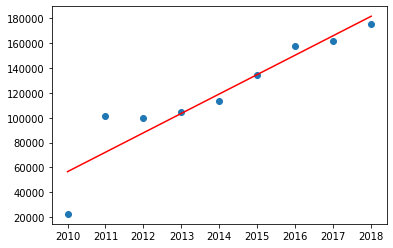

In [100]:
X = fl_df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = fl_df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [101]:
int_migration_graph_fl = px.line(fl_df, x = 'Year', y = "International Migration to Florida", title='International Migration To Florida in the past 9 years 2010 - 2018')
int_migration_graph_fl.show()

In [102]:
ny = population_data.loc[population_data['Area_Name'] == 'New York']
ny_2010 = ny['INTERNATIONAL_MIG_2010'].tolist()
ny_2011 = ny['INTERNATIONAL_MIG_2011'].tolist()
ny_2012 = ny['INTERNATIONAL_MIG_2012'].tolist()
ny_2013 = ny['INTERNATIONAL_MIG_2013'].tolist()
ny_2014 = ny['INTERNATIONAL_MIG_2014'].tolist()
ny_2015 = ny['INTERNATIONAL_MIG_2015'].tolist()
ny_2016 = ny['INTERNATIONAL_MIG_2016'].tolist()
ny_2017 = ny['INTERNATIONAL_MIG_2017'].tolist()
ny_2018 = ny['INTERNATIONAL_MIG_2018'].tolist()

ny_international_mig = ny_2010 + ny_2011 + ny_2012 + ny_2013 + ny_2014 + ny_2015 + ny_2016 + ny_2017 + ny_2018
years_mig = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

ny_df = DataFrame({"Year":years_mig, "International Migration to New York":ny_international_mig})


ny_df

Year  International Migration to New York
0  2010                              19141.0
1  2011                              87879.0
2  2012                              90870.0
3  2013                              78677.0
4  2014                              85344.0
5  2015                              85244.0
6  2016                              88905.0
7  2017                              67949.0
8  2018                              70375.0

In [103]:
int_migration_graph_ny = px.line(ny_df, x = 'Year', y = "International Migration to New York", title='International Migration To New York in the past 9 years 2010 - 2018')
int_migration_graph_ny.show()

In [104]:
ca = population_data.loc[population_data['Area_Name'] == 'California']
ca_2010 = ca['INTERNATIONAL_MIG_2010'].tolist()
ca_2011 = ca['INTERNATIONAL_MIG_2011'].tolist()
ca_2012 = ca['INTERNATIONAL_MIG_2012'].tolist()
ca_2013 = ca['INTERNATIONAL_MIG_2013'].tolist()
ca_2014 = ca['INTERNATIONAL_MIG_2014'].tolist()
ca_2015 = ca['INTERNATIONAL_MIG_2015'].tolist()
ca_2016 = ca['INTERNATIONAL_MIG_2016'].tolist()
ca_2017 = ca['INTERNATIONAL_MIG_2017'].tolist()
ca_2018 = ca['INTERNATIONAL_MIG_2018'].tolist()

ca_international_mig = ca_2010 + ca_2011 + ca_2012 + ca_2013 + ca_2014 + ca_2015 + ca_2016 + ca_2017 + ca_2018
years_mig = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

ca_df = DataFrame({"Year":years_mig, "International Migration to California":ca_international_mig})


ca_df

Year  International Migration to California
0  2010                                21145.0
1  2011                               105527.0
2  2012                               105015.0
3  2013                               123416.0
4  2014                               138111.0
5  2015                               164026.0
6  2016                               148792.0
7  2017                               119732.0
8  2018                               117797.0

In [105]:
int_migration_graph_ca = px.line(ca_df, x = 'Year', y = "International Migration to California", title='International Migration To California in the past 9 years 2010 - 2018')
int_migration_graph_ca.show()

In [106]:
tx = population_data.loc[population_data['Area_Name'] == 'Texas']
tx_2010 = tx['INTERNATIONAL_MIG_2010'].tolist()
tx_2011 = tx['INTERNATIONAL_MIG_2011'].tolist()
tx_2012 = tx['INTERNATIONAL_MIG_2012'].tolist()
tx_2013 = tx['INTERNATIONAL_MIG_2013'].tolist()
tx_2014 = tx['INTERNATIONAL_MIG_2014'].tolist()
tx_2015 = tx['INTERNATIONAL_MIG_2015'].tolist()
tx_2016 = tx['INTERNATIONAL_MIG_2016'].tolist()
tx_2017 = tx['INTERNATIONAL_MIG_2017'].tolist()
tx_2018 = tx['INTERNATIONAL_MIG_2018'].tolist()

tx_international_mig = tx_2010 + tx_2011 + tx_2012 + tx_2013 + tx_2014 + tx_2015 + tx_2016 + tx_2017 + tx_2018
years_mig = [2010,2011,2012,2013,2014,2015,2016,2017,2018]

tx_df = DataFrame({"Year":years_mig, "International Migration to Texas":tx_international_mig})


tx_df

Year  International Migration to Texas
0  2010                           15567.0
1  2011                           71953.0
2  2012                           88080.0
3  2013                           83041.0
4  2014                          110340.0
5  2015                          121124.0
6  2016                          115228.0
7  2017                          103032.0
8  2018                          104976.0

In [107]:
int_migration_graph_tx = px.line(tx_df, x = 'Year', y = "International Migration to Texas", title='International Migration To Texas in the past 9 years 2010 - 2018')
int_migration_graph_tx.show()

In [108]:
trace0 = go.Scatter(
    x = years_mig,
    y = fl_international_mig,
    mode = "lines",
    name = "Florida"
)

trace1 = go.Scatter(
    x = years_mig,
    y = ny_international_mig,
    mode = "lines",
    name = "New York"
)

trace2 = go.Scatter(
    x = years_mig,
    y = tx_international_mig,
    mode = "lines",
    name = "Texas"
)

trace3 = go.Scatter(
    x = years_mig,
    y = ca_international_mig,
    mode = "lines",
    name = "California"
)



data = [trace0,trace1, trace2, trace3]

layout = go.Layout(
    title = "International Migration 2010 - 2018",
     xaxis=dict(
        title='Year',
        tickmode='linear'),
     yaxis=dict(
        title='Internation Migration')
        
)
fig = go.Figure(data = data, layout = layout)
fig.show()